In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# load Salary file into data frame
namesSalaryData = ['YearsExperience' , 'Salary']
dfSalary = pd.read_csv("../DataSets/Salary_Data.csv",names=namesSalaryData)

# load insurance file into data frame
namesInsuranceDaa = ['age' , 'sex' , 'bmi' , 'children' , 'smoker','region','charges']
dfinsurance = pd.read_csv("../DataSets/insurance.csv",names=namesInsuranceDaa)

In [3]:
#Display Salary data
dfSalary.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
#Display insurance data
dfinsurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
dfinsurance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
dfSalary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
#lines and columns count
dfSalary.shape

(30, 2)

In [8]:
#lines and columns count
dfinsurance.shape

(1338, 7)

In [9]:
#collumns names
dfinsurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
#collumns names
dfSalary.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [11]:
#data describtion
dfinsurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
#data describtion
dfSalary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


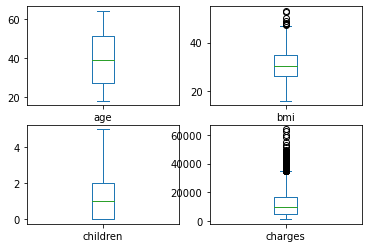

In [13]:
#spot outlayers
dfinsurance.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False) 
plt.show()

In [14]:
#deleting outlayers
Q1charges = dfinsurance.charges.quantile(0.25)
Q3charges = dfinsurance.charges.quantile(0.75)
IQRCharges= Q3charges - Q1charges
lower_limit_charges = Q1charges - 1.5*IQRCharges
upper_limit_charges = Q3charges + 1.5*IQRCharges

Q1Bmi = dfinsurance.bmi.quantile(0.25)
Q3Bmi = dfinsurance.bmi.quantile(0.75)
IQRBmi= Q3Bmi - Q1Bmi
lower_limit_bmi = Q1Bmi - 1.5*IQRBmi
upper_limit_bmi = Q3Bmi + 1.5*IQRBmi

dfinsurance=dfinsurance[(dfinsurance.charges>lower_limit_charges)&(dfinsurance.charges<upper_limit_charges)&(dfinsurance.bmi>lower_limit_bmi)&(dfinsurance.bmi<upper_limit_bmi)]

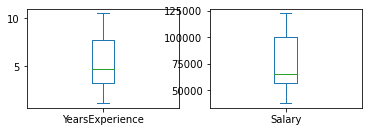

In [15]:
#spot outlayers
dfSalary.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False) 
plt.show()

In [16]:
dfinsurance['sex'].unique()

array(['female', 'male'], dtype=object)

In [17]:
dfinsurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [18]:
from sklearn import preprocessing
l3= preprocessing.LabelEncoder()
dfinsurance['region']= l3.fit_transform(dfinsurance['region'])
dfinsurance['region'].unique()


#or use this
#dfinsurance['region'] = dfinsurance['region'].map({'southwest' : 0 ,'southeast' : 1 ,'northwest' : 2 ,'northeast' : 3 })

C:\Users\OMARRA~1\AppData\Local\Temp/ipykernel_10632/2463233627.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfinsurance['region']= l3.fit_transform(dfinsurance['region'])


array([3, 2, 1, 0])

In [19]:
#dfinsurance['sex'] = dfinsurance['sex'].map({'male' : 1 ,'female' : 0 })

dfinsurance['sex']=l3.fit_transform(dfinsurance['sex'])
dfinsurance['sex'].unique()

C:\Users\OMARRA~1\AppData\Local\Temp/ipykernel_10632/1083330648.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfinsurance['sex']=l3.fit_transform(dfinsurance['sex'])


array([0, 1])

In [20]:
dfinsurance['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [21]:
dfinsurance['smoker']=l3.fit_transform(dfinsurance['smoker'])
dfinsurance['smoker'].unique()


C:\Users\OMARRA~1\AppData\Local\Temp/ipykernel_10632/3408321240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfinsurance['smoker']=l3.fit_transform(dfinsurance['smoker'])


array([1, 0])

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'smoker'}>,
        <AxesSubplot:title={'center':'region'}>],
       [<AxesSubplot:title={'center':'charges'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

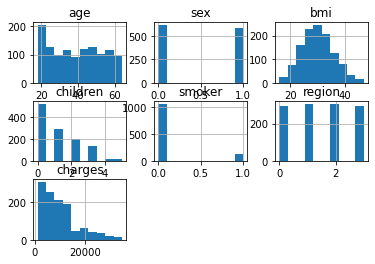

In [22]:
#drawing insurance histograms
dfinsurance.hist()

array([[<AxesSubplot:title={'center':'YearsExperience'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

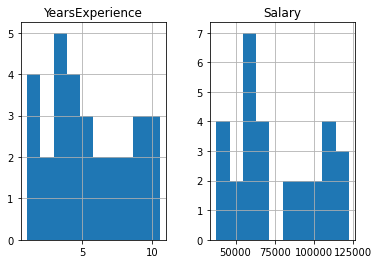

In [23]:
#drawing salary histograms
dfSalary.hist()

In [24]:
dfSalary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [25]:
dfinsurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [26]:
dfinsurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [28]:
from sklearn import model_selection

In [30]:
dfinsurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [31]:
dfSalary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


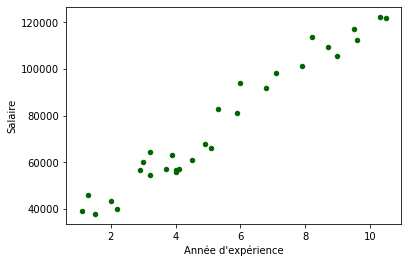

In [32]:
dfSalary.plot.scatter(x="YearsExperience", y="Salary", color="DarkGreen")
plt.xlabel("Année d'expérience")
plt.ylabel("Salaire")
plt.show()

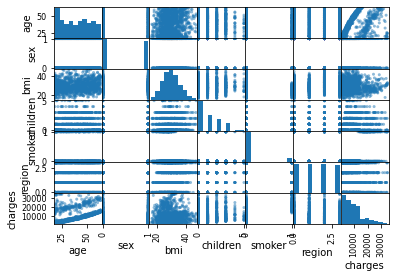

In [33]:
from pandas.plotting import scatter_matrix
scatter_matrix(dfinsurance)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

X = dfSalary['Salary'].values.reshape(-1, 1)

Y = dfSalary['YearsExperience'].values.reshape(-1, 1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("b0 (intercept) = " + str(regressor.intercept_))
print("b1 (coefficient) = " + str(regressor.coef_))

b0 (intercept) = [-2.40913148]
b1 (coefficient) = [[0.00010107]]


In [36]:
y_pred = regressor.predict(X_test)

print(len(y_pred))
print(len(y_test))

df = pd.DataFrame({
 'Actuel': y_test.flatten(),
 'Predicted': y_pred.flatten()
})
print(df)

6
6
   Actuel  Predicted
0     1.5   1.404231
1    10.3   9.960572
2     4.1   3.359880
3     3.9   3.980128
4     9.5   9.412586
5     8.7   8.650742


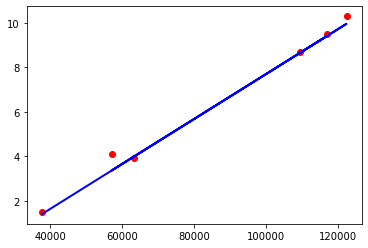

In [37]:
plt.scatter(X_test, y_test, color="red")
plt.plot(X_test, y_pred, color="blue", linewidth=2)
plt.show()

In [38]:
import sklearn.metrics as metrics

MAR = metrics.mean_absolute_error(y_test, y_pred)
MSR = metrics.mean_squared_error(y_test, y_pred)
RMSR = np.sqrt(MSR)
print("Mean Absolute Error :", MAR)
print("Mean Squared Error :", MSR)
print("Root Mean Squared Error :", RMSR)

Mean Absolute Error : 0.23201950898476728
Mean Squared Error : 0.11477487025592327
Root Mean Squared Error : 0.33878440084502603


In [39]:
dfinsurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [40]:
#normalization
Xins = dfinsurance[['sex','bmi','smoker','region','charges']].values
Yins = dfinsurance['age'].values.reshape(-1, 1)

scalar= MinMaxScaler()
scalar.fit(Xins[:, [1, 4]])
newDataIns = scalar.transform(Xins[:, [1, 4]])

Xins[:, [1, 4]]=newDataIns

In [41]:
X_trainIns, X_testIns, Y_trainIns, Y_testIns = train_test_split(Xins, Yins, test_size=0.2,random_state=0)
regressor = LinearRegression()
regressor.fit(X_trainIns, Y_trainIns)
print("b0 (intercept) = " + str(regressor.intercept_))
print("b1 (coefficient) = " + str(regressor.coef_))

b0 (intercept) = [26.83268994]
b1 (coefficient) = [[  0.17269803   2.46317249 -21.5080868    0.73480001  46.26698852]]


In [42]:
Y_predIns = regressor.predict(X_testIns)
print(len(Y_predIns))
print(len(Y_testIns))
df = pd.DataFrame({
 'Actuel': Y_testIns.flatten(),
 'Predicted': Y_predIns.flatten()
})
print(df)

239
239
     Actuel  Predicted
0        30  32.261892
1        36  35.462277
2        49  42.801497
3        36  34.645171
4        31  33.576161
..      ...        ...
234      34  63.943763
235      19  29.683029
236      21  30.515670
237      21  31.061788
238      58  43.707455

[239 rows x 2 columns]


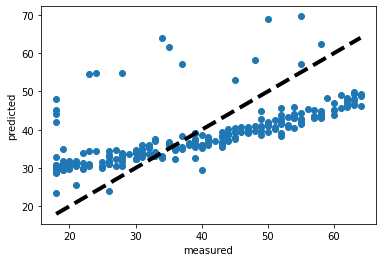

In [43]:
fig, ax = plt.subplots()
ax.scatter(Y_testIns, Y_predIns)
ax.plot([Y_testIns.min(), Y_testIns.max()], [Y_testIns.min(),
Y_testIns.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [44]:
MAR = metrics.mean_absolute_error(Y_testIns, Y_predIns)
MSR = metrics.mean_squared_error(Y_testIns, Y_predIns)
RMSR = np.sqrt(MSR)
print("Mean Absolute Error :", MAR)
print("Mean Squared Error :", MSR)
print("Root Mean Squared Error :", RMSR)

Mean Absolute Error : 8.688024806109219
Mean Squared Error : 110.43224368608267
Root Mean Squared Error : 10.508674687422895
